# Data Mining Project 1
## WHO Life Expectancy 

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calling the dataset
Life=pd.read_csv('Life.csv')

# 1. Prepocessing Data

In [2]:
Life

,Country,Year,Continent,Status,Life_expectancy,Adult_Mortality,infant_deaths,BMI,Polio,Diphtheria,HIV_AIDS
0,Afghanistan,2015,Asia,Developing,65.0,263.0,62,19.1,6.0,65.0,0.1
1,Afghanistan,2014,Asia,Developing,59.9,271.0,64,18.6,58.0,62.0,0.1
2,Afghanistan,2013,Asia,Developing,59.9,268.0,66,18.1,62.0,64.0,0.1
3,Afghanistan,2012,Asia,Developing,59.5,272.0,69,17.6,67.0,67.0,0.1
4,Afghanistan,2011,Asia,Developing,59.2,275.0,71,17.2,68.0,68.0,0.1
...,...,...,...,...,...,...,...,...,...,...,...
2924,Zimbabwe,2004,Africa,Developing,44.3,723.0,27,27.1,67.0,65.0,33.6
2925,Zimbabwe,2003,Africa,Developing,44.5,715.0,26,26.7,7.0,68.0,36.7
2926,Zimbabwe,2002,Africa,Developing,44.8,73.0,25,26.3,73.0,71.0,39.8
2927,Zimbabwe,2001,Africa,Developing,45.3,686.0,25,25.9,76.0,75.0,42.1


In [3]:
#The type of the data
Life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2929 entries, 0 to 2928
Data columns (total 11 columns):
Country            2929 non-null object
Year               2929 non-null int64
Continent          2929 non-null object
Status             2929 non-null object
Life_expectancy    2928 non-null float64
Adult_Mortality    2928 non-null float64
infant_deaths      2929 non-null int64
BMI                2897 non-null float64
Polio              2910 non-null float64
Diphtheria         2910 non-null float64
HIV_AIDS           2929 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 251.8+ KB


### Detect Outliers

In [56]:
#Detect the outliers
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers


In [59]:
pout=detect_outlier(Life['Polio'])
print('Polio outlier :')
len(pout)


Polio outlier :


171

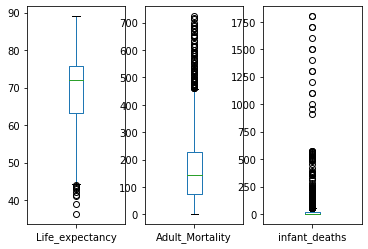

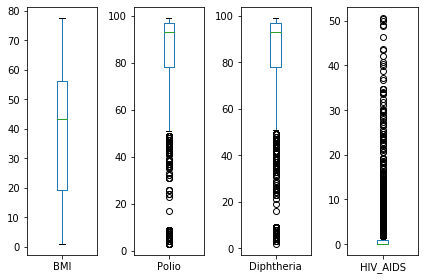

In [63]:
#Find Outliers Using Boxplot
fig, (ax1, ax2, ax3)=plt.subplots(ncols=3)
fig, (ax4, ax5, ax6, ax7)=plt.subplots(ncols=4)
Life['Life_expectancy'].plot.box(ax=ax1)
Life['Adult_Mortality'].plot.box(ax=ax2)
Life['infant_deaths'].plot.box(ax=ax3)
Life['BMI'].plot.box(ax=ax4)
Life['Polio'].plot.box(ax=ax5)
Life['Diphtheria'].plot.box(ax=ax6)
Life['HIV_AIDS'].plot.box(ax=ax7)
fig.tight_layout()

### Filling The Missing Value Based on The Distribution

In [4]:
#Find the missing value
np.sum(Life.isnull())

Country             0
Year                0
Continent           0
Status              0
Life_expectancy     1
Adult_Mortality     1
infant_deaths       0
BMI                32
Polio              19
Diphtheria         19
HIV_AIDS            0
dtype: int64

C:\Users\asus\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\asus\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.710e+02, 1.000e+00, 1.000e+01, 2.600e+01, 7.000e+01, 8.500e+01,
        1.500e+02, 2.700e+02, 4.460e+02, 1.681e+03]),
 array([ 3. , 12.6, 22.2, 31.8, 41.4, 51. , 60.6, 70.2, 79.8, 89.4, 99. ]),
 <a list of 10 Patch objects>)

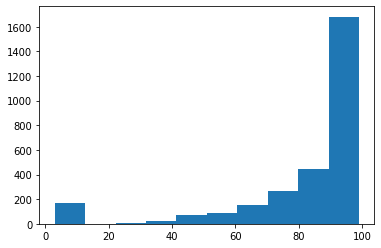

In [50]:
plt.hist(Life.Polio)

(array([729., 765., 610., 423., 176., 117.,  54.,  24.,  17.,  13.]),
 array([  1. ,  73.2, 145.4, 217.6, 289.8, 362. , 434.2, 506.4, 578.6,
        650.8, 723. ]),
 <a list of 10 Patch objects>)

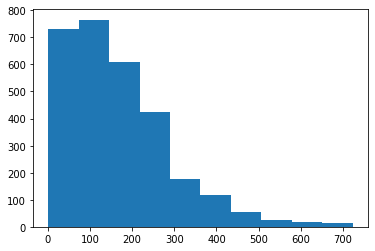

In [51]:
plt.hist(Life.Adult_Mortality)

(array([  4.,  50., 134., 229., 277., 405., 580., 819., 362.,  68.]),
 array([36.3 , 41.57, 46.84, 52.11, 57.38, 62.65, 67.92, 73.19, 78.46,
        83.73, 89.  ]),
 <a list of 10 Patch objects>)

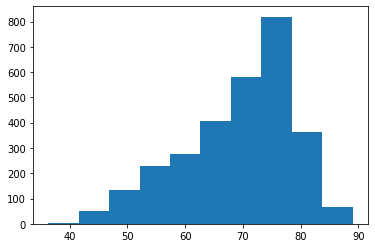

In [9]:
plt.hist(Life.Life_expectancy)

(array([205.,  78., 207., 313., 250., 143., 106.,  97., 207., 223., 443.,
        367., 194.,  42.,  22.]),
 array([ 1.        ,  6.10666667, 11.21333333, 16.32      , 21.42666667,
        26.53333333, 31.64      , 36.74666667, 41.85333333, 46.96      ,
        52.06666667, 57.17333333, 62.28      , 67.38666667, 72.49333333,
        77.6       ]),
 <a list of 15 Patch objects>)

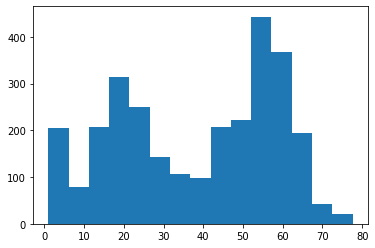

In [10]:
plt.hist(Life.BMI,bins=15)

(array([2836.,   42.,   27.,    8.,    0.,    3.,    3.,    3.,    3.,
           4.]),
 array([   0.,  180.,  360.,  540.,  720.,  900., 1080., 1260., 1440.,
        1620., 1800.]),
 <a list of 10 Patch objects>)

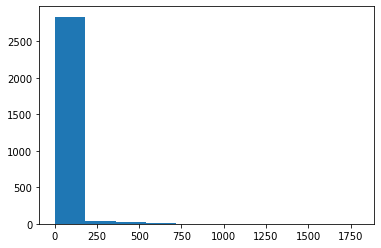

In [11]:
plt.hist(Life.infant_deaths)

(array([ 169.,    3.,   22.,   35.,   68.,   59.,  149.,  271.,  469.,
        1665.]),
 array([ 2. , 11.7, 21.4, 31.1, 40.8, 50.5, 60.2, 69.9, 79.6, 89.3, 99. ]),
 <a list of 10 Patch objects>)

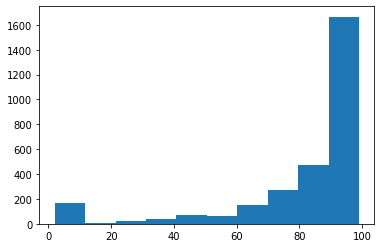

In [12]:
plt.hist(Life.Diphtheria)

(array([2687.,  119.,   44.,   22.,   19.,   13.,   10.,    5.,    4.,
           6.]),
 array([ 0.1 ,  5.15, 10.2 , 15.25, 20.3 , 25.35, 30.4 , 35.45, 40.5 ,
        45.55, 50.6 ]),
 <a list of 10 Patch objects>)

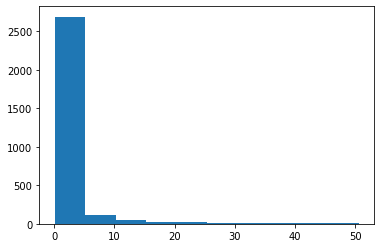

In [13]:
plt.hist(Life.HIV_AIDS)

#### If the distribution is skewness better using median. If the distribution is normal better using mean

In [15]:
# Fill Missing Value
Life['BMI']=Life['BMI'].fillna(Life['BMI'].mean())
Life['Polio']=Life['Polio'].fillna(Life['Polio'].median())
Life['Diphtheria']=Life['Diphtheria'].fillna(Life['Diphtheria'].median())
Life['Adult_Mortality']=Life['Adult_Mortality'].fillna(Life['Adult_Mortality'].median())
Life['Life_expectancy']=Life['Life_expectancy'].fillna(Life['Life_expectancy'].median())
Life['HIV_AIDS']=Life['HIV_AIDS'].fillna(Life['HIV_AIDS'].median())
Life

,Country,Year,Continent,Status,Life_expectancy,Adult_Mortality,infant_deaths,BMI,Polio,Diphtheria,HIV_AIDS
0,Afghanistan,2015,Asia,Developing,65.0,263.0,62,19.1,6.0,65.0,0.1
1,Afghanistan,2014,Asia,Developing,59.9,271.0,64,18.6,58.0,62.0,0.1
2,Afghanistan,2013,Asia,Developing,59.9,268.0,66,18.1,62.0,64.0,0.1
3,Afghanistan,2012,Asia,Developing,59.5,272.0,69,17.6,67.0,67.0,0.1
4,Afghanistan,2011,Asia,Developing,59.2,275.0,71,17.2,68.0,68.0,0.1
...,...,...,...,...,...,...,...,...,...,...,...
2924,Zimbabwe,2004,Africa,Developing,44.3,723.0,27,27.1,67.0,65.0,33.6
2925,Zimbabwe,2003,Africa,Developing,44.5,715.0,26,26.7,7.0,68.0,36.7
2926,Zimbabwe,2002,Africa,Developing,44.8,73.0,25,26.3,73.0,71.0,39.8
2927,Zimbabwe,2001,Africa,Developing,45.3,686.0,25,25.9,76.0,75.0,42.1


# 2. Descriptive Statistics

In [3]:
#Descriptive Statistics
Life[['Life_expectancy','Adult_Mortality','infant_deaths','BMI','Polio','Diphtheria','HIV_AIDS']].describe()

,Life_expectancy,Adult_Mortality,infant_deaths,BMI,Polio,Diphtheria,HIV_AIDS
count,2928.000000,2928.000000,2929.000000,2897.000000,2910.000000,2910.000000,2929.000000
mean,69.224932,164.796448,30.397064,38.242354,82.552921,82.326117,1.747149
std,9.523867,124.292079,118.095615,19.959660,23.413976,23.703925,5.084765
min,36.300000,1.000000,0.000000,1.000000,3.000000,2.000000,0.100000
25%,63.100000,74.000000,0.000000,19.300000,78.000000,78.000000,0.100000
50%,72.100000,144.000000,3.000000,43.400000,93.000000,93.000000,0.100000
75%,75.700000,228.000000,22.000000,56.100000,97.000000,97.000000,0.800000
max,89.000000,723.000000,1800.000000,77.600000,99.000000,99.000000,50.600000


# 3. Visualization

In [9]:
data2015 = Life[Life.Year == 2015]
top10 = data2015.sort_values('Life_expectancy', ascending=True).head(10)

In [6]:
data2013 = Life[Life.Year == 2013]
topten2013 = data2013.sort_values('Life_expectancy', ascending=True).head(10)

In [5]:
data2014 = Life[Life.Year == 2014]
topten2014 = data2014.sort_values('Life_expectancy', ascending=True).head(10)

In [7]:
data2012 = Life[Life.Year == 2012]
topten2012 = data2012.sort_values('Life_expectancy', ascending=True).head(10)

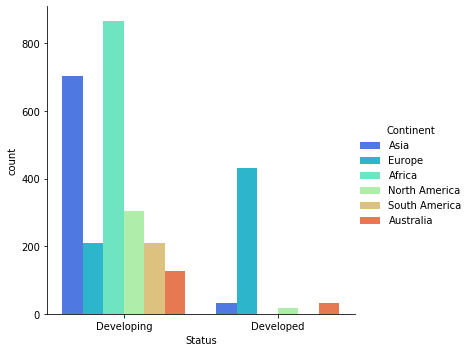

In [3]:
sns.catplot(x='Status',kind='count',hue='Continent',palette='rainbow',data=Life)

Text(0.5, 0, 'Year')

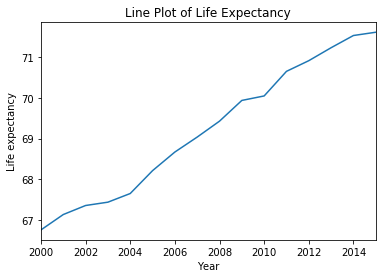

In [4]:
Life.groupby('Year').Life_expectancy.mean().plot(kind='line')
plt.title('Line Plot of Life Expectancy')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

Life Expectancy in the world increasing 

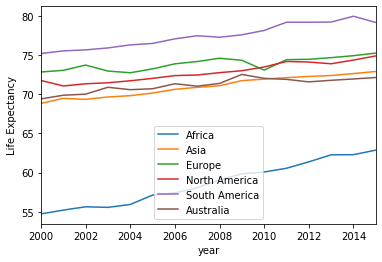

In [6]:
Africa=Life[Life.Continent == 'Africa']
Asia=Life[Life.Continent == 'Asia']
NAmerica=Life[Life.Continent == 'North America']
SAmerica=Life[Life.Continent == 'South America']
Europe=Life[Life.Continent == 'Europe']
Australia=Life[Life.Continent == 'Australia']
Africa.groupby('Year').Life_expectancy.mean().plot(kind='line')
Asia.groupby('Year').Life_expectancy.mean().plot(kind='line')
NAmerica.groupby('Year').Life_expectancy.mean().plot(kind='line')
SAmerica.groupby('Year').Life_expectancy.mean().plot(kind='line')
Europe.groupby('Year').Life_expectancy.mean().plot(kind='line')
Australia.groupby('Year').Life_expectancy.mean().plot(kind='line')

plt.legend(['Africa', 'Asia','Europe','North America','South America','Australia'])
plt.xlabel('year')
plt.ylabel('Life Expectancy')
plt.show()


Africa has the lowest life expectancy in the world

#### Visualization of The Lowest Life Expectation in The World from 2012-2015

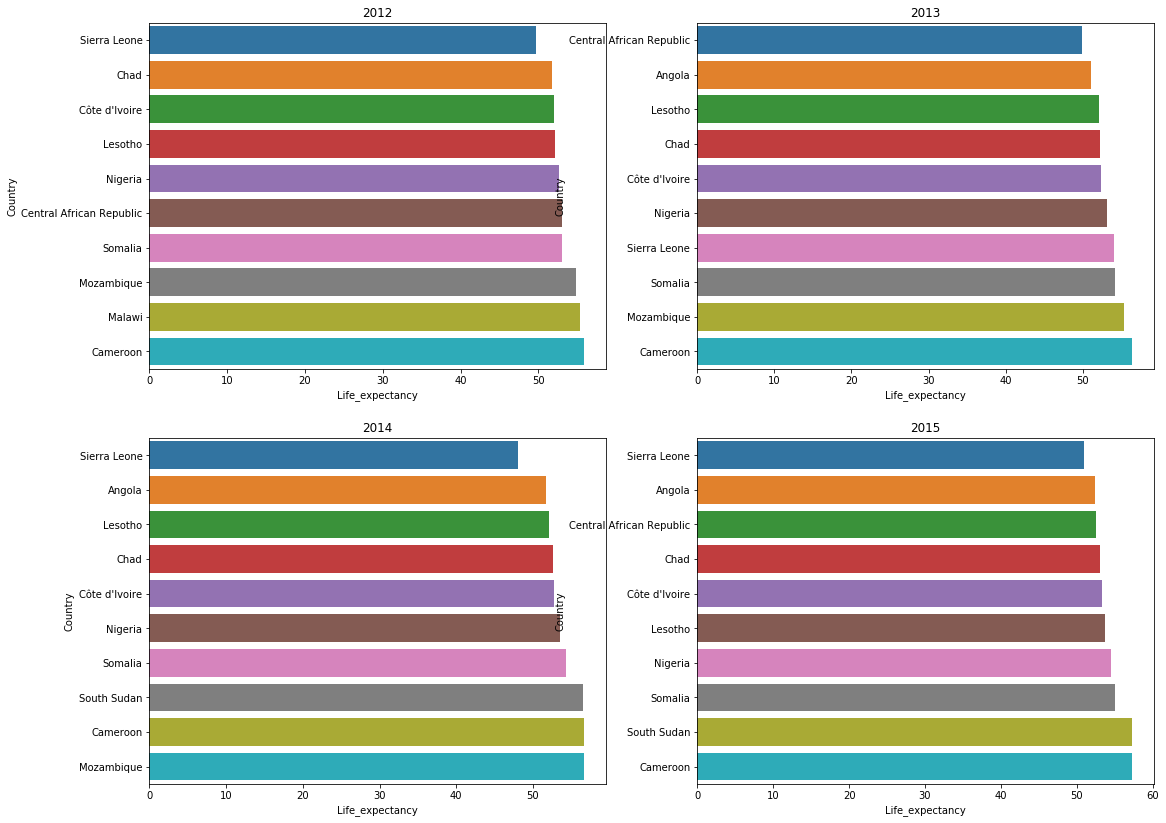

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(18,14)) 
ax = sns.barplot("Life_expectancy", y="Country", data=top10, ax=axes[1,1] ).set(title='2015')
ax = sns.barplot("Life_expectancy", y="Country", data=topten2014, ax=axes[1,0] ).set(title='2014') 
ax = sns.barplot("Life_expectancy", y="Country", data=topten2013, ax=axes[0,1] ).set(title='2013') 
ax = sns.barplot("Life_expectancy", y="Country", data=topten2012, ax=axes[0,0] ).set(title='2012')

##### Find the correlation among variables in Africa

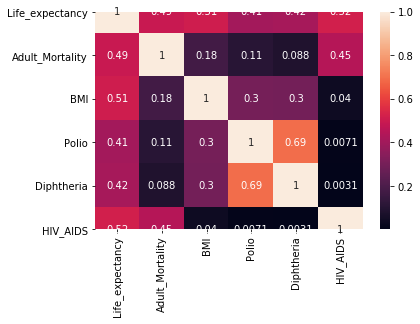

In [25]:
Af=Africa.select_dtypes([np.float])
corr=Af.corr()
sns.heatmap(corr.abs(),annot=True)

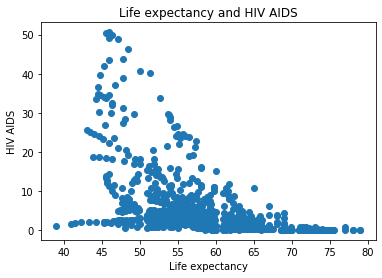

In [70]:
Africa=Life[Life.Continent == 'Africa']
plt.scatter(Africa.Life_expectancy,Africa.HIV_AIDS)
plt.title('Life expectancy and HIV AIDS')
plt.xlabel('Life expectancy')
plt.ylabel('HIV AIDS')
plt.show()

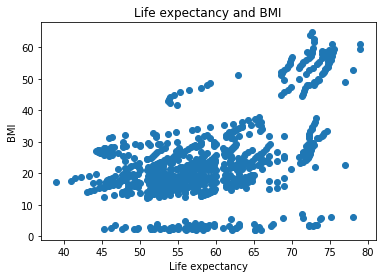

In [17]:
Africa=Life[Life.Continent == 'Africa']
plt.scatter(Africa.Life_expectancy,Africa.BMI)
plt.title('Life expectancy and BMI')
plt.xlabel('Life expectancy')
plt.ylabel('BMI')
plt.show()

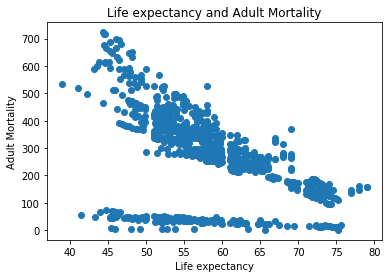

In [66]:
Africa=Life[Life.Continent == 'Africa']
plt.scatter(Africa.Life_expectancy,Africa.Adult_Mortality)
plt.title('Life expectancy and Adult Mortality')
plt.xlabel('Life expectancy')
plt.ylabel('Adult Mortality')
plt.show()

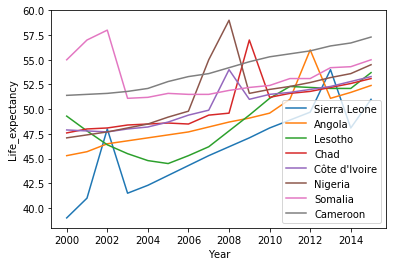

In [4]:
SL = Life[Life.Country == 'Sierra Leone']
ANG = Life[Life.Country == "Angola"]
LT = Life[Life.Country == "Lesotho"]
CH = Life[Life.Country == "Chad"]
CDI= Life[Life.Country == "Côte d'Ivoire"]
NG= Life[Life.Country == "Nigeria"]
SO= Life[Life.Country == "Somalia"]
CM= Life[Life.Country == "Cameroon"]
plt.plot(SL.Year, SL.Life_expectancy)
plt.plot(ANG.Year, ANG.Life_expectancy)
plt.plot(LT.Year, LT.Life_expectancy)
plt.plot(CH.Year, CH.Life_expectancy)
plt.plot(CDI.Year, CDI.Life_expectancy)
plt.plot(NG.Year, NG.Life_expectancy)
plt.plot(SO.Year, SO.Life_expectancy)
plt.plot(CM.Year, CM.Life_expectancy)
plt.legend(['Sierra Leone', "Angola", "Lesotho", "Chad", "Côte d'Ivoire", "Nigeria", "Somalia", "Cameroon"])
plt.xlabel('Year')
plt.ylabel('Life_expectancy')
plt.show()